In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def plot_radial(rfunc, n_theta=256):
    # Generate a closed non-radial curve
    t = np.linspace(0, 2 * np.pi, 500)
    rvals = rfunc(t)
    xx = rvals * np.cos(t)
    yy = rvals * np.sin(t)
    # Plot the curve
    fig = plt.figure(figsize=(8, 6))
    plt.plot(xx, yy, color="green")
    plt.xlabel("X", fontsize=12)
    plt.ylabel("Y", fontsize=12)
    plt.grid(True, linestyle="--", alpha=0.7)
    plt.axis("equal")
    plt.legend()
    plt.show()
    fig.clf()

/var/folders/yp/sztpn13x2vq42vlgbb1zx8b80000gn/T/ipykernel_15026/1448972256.py:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


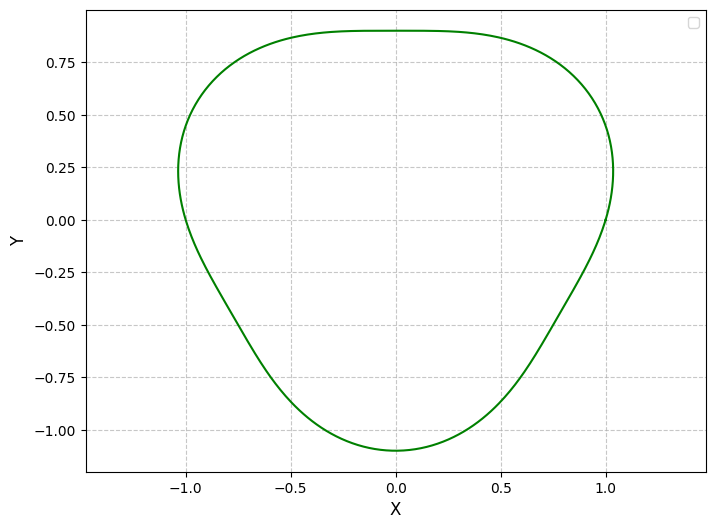

In [3]:
plot_radial(lambda t: 1 + 0.1 * np.sin(3*t))

/var/folders/yp/sztpn13x2vq42vlgbb1zx8b80000gn/T/ipykernel_15026/1448972256.py:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


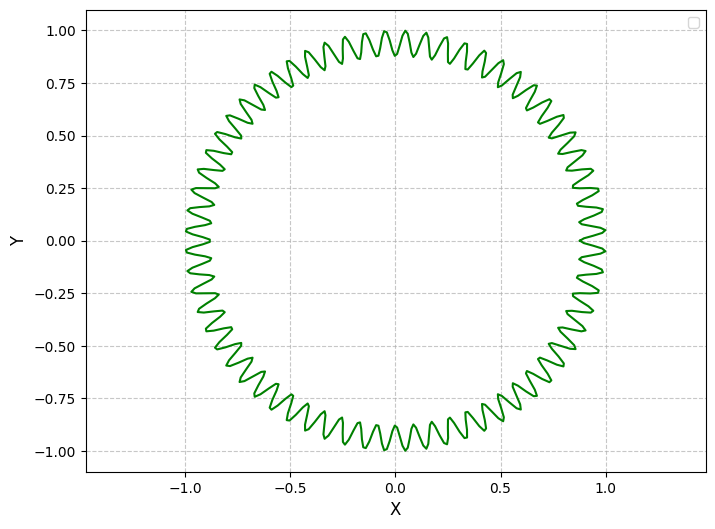

In [4]:
plot_radial(lambda t: np.cos(np.cos(32*t)/2))

/var/folders/yp/sztpn13x2vq42vlgbb1zx8b80000gn/T/ipykernel_15026/1448972256.py:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


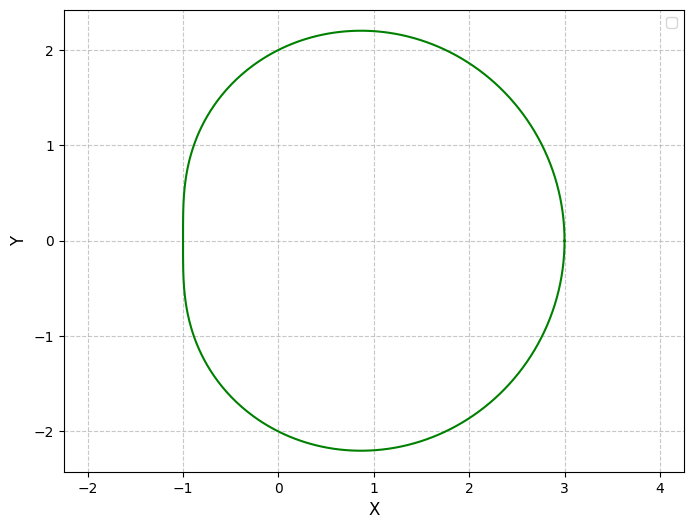

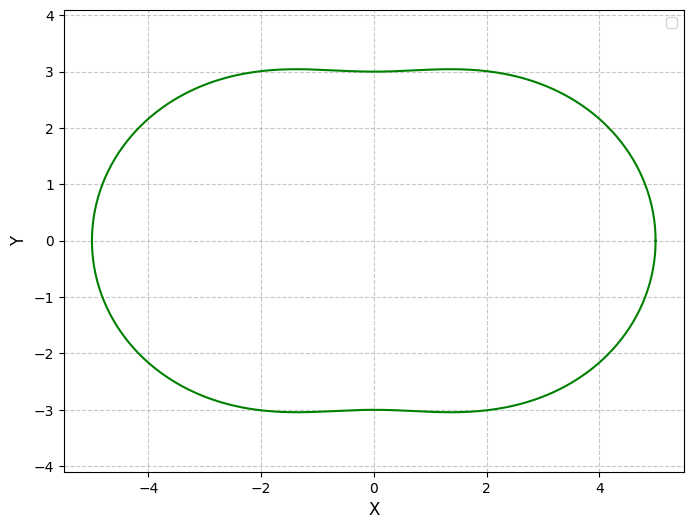

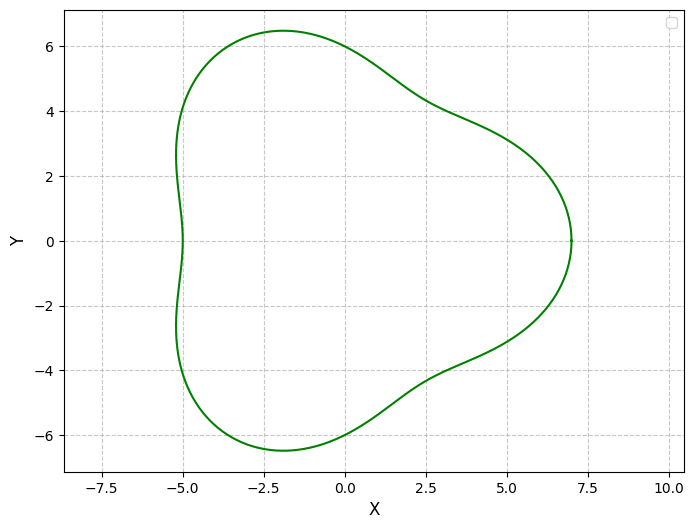

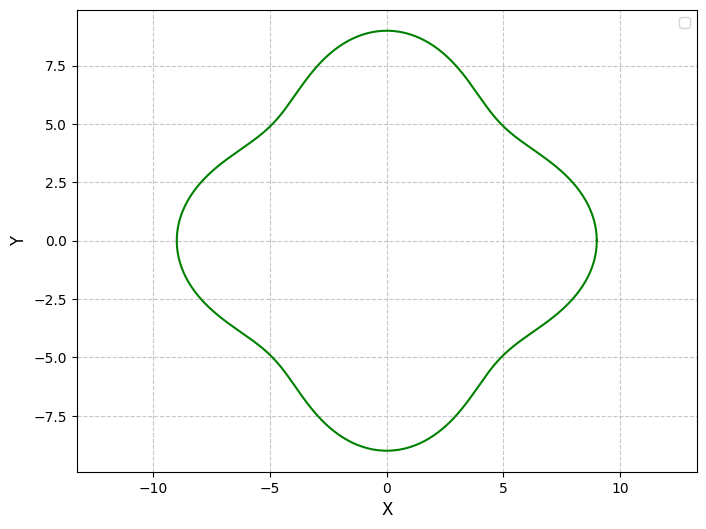

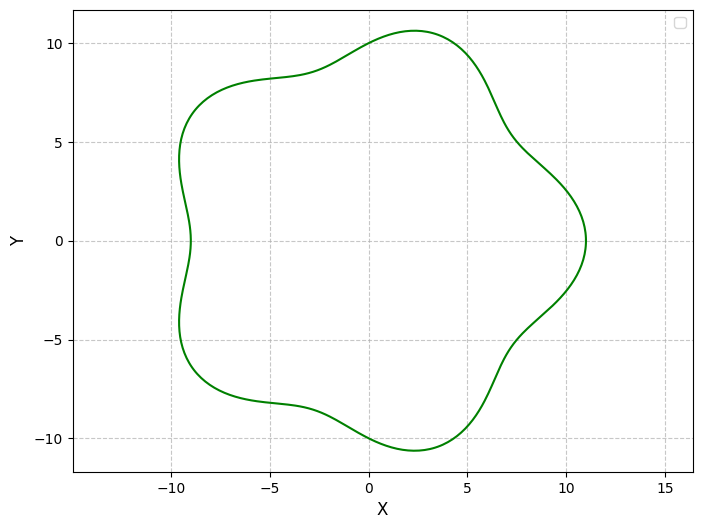

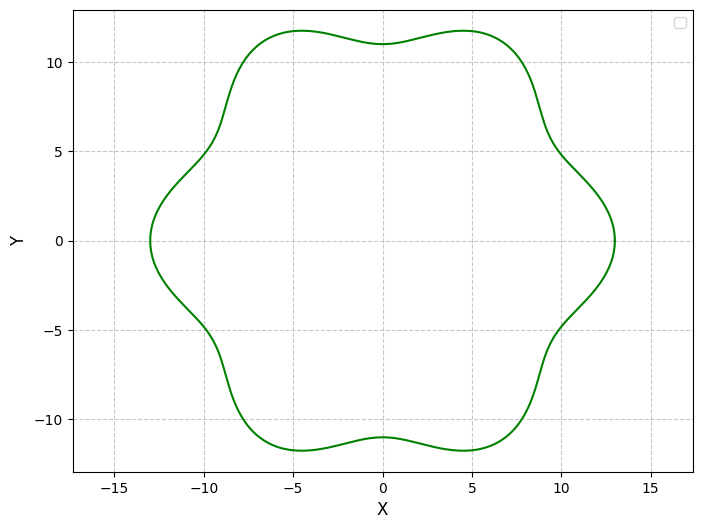

In [5]:
for k in range(1, 7):
    # plot_radial(lambda t: (2*k+np.cos(k*t))/(4*k))
    plot_radial(lambda t: 2*k+np.cos(k*t))

/var/folders/yp/sztpn13x2vq42vlgbb1zx8b80000gn/T/ipykernel_15026/1448972256.py:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


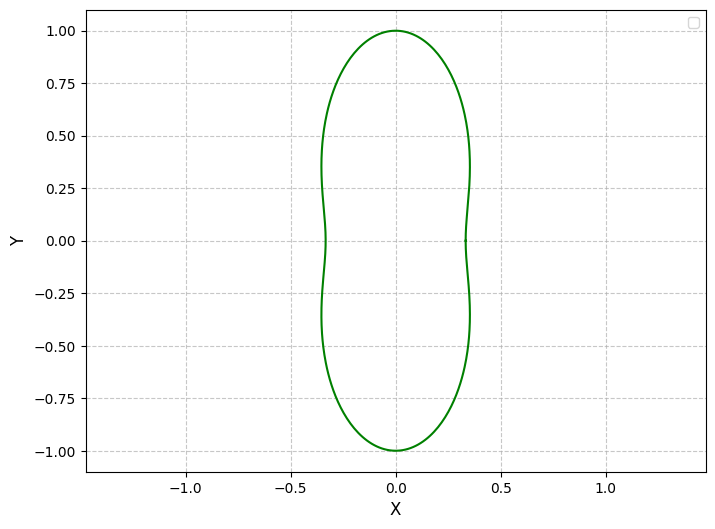

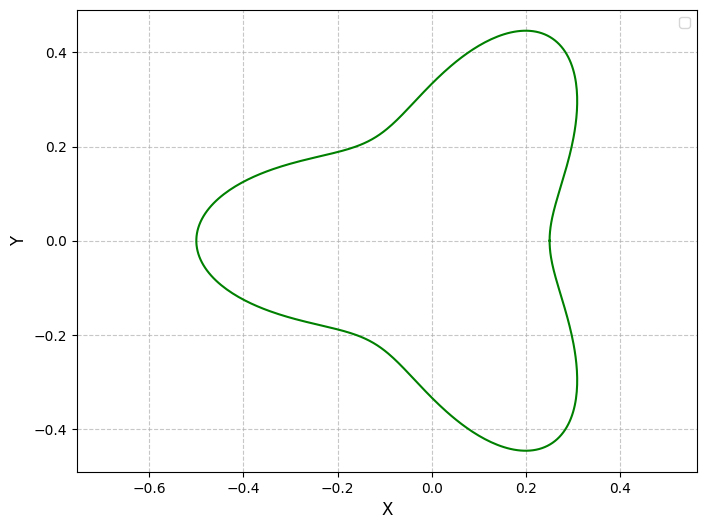

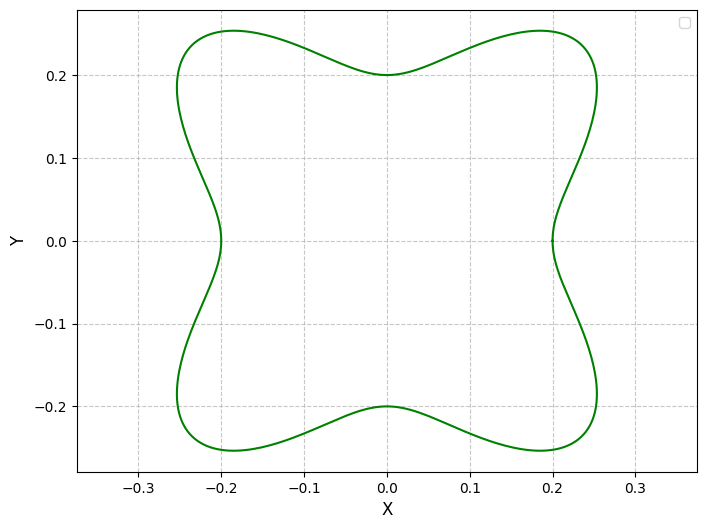

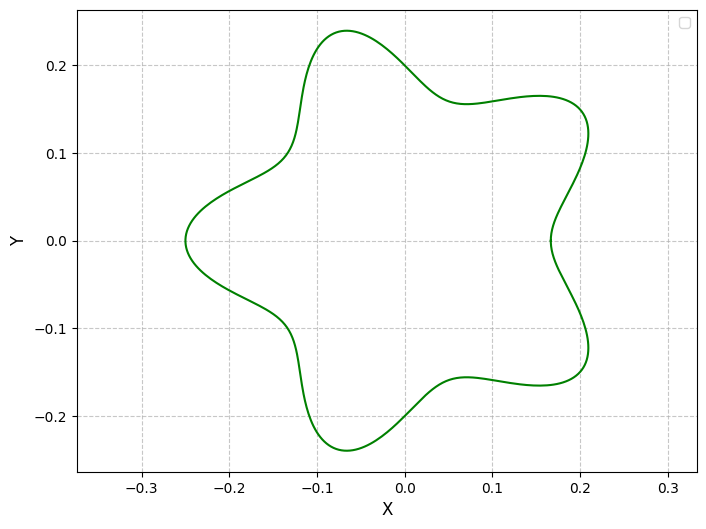

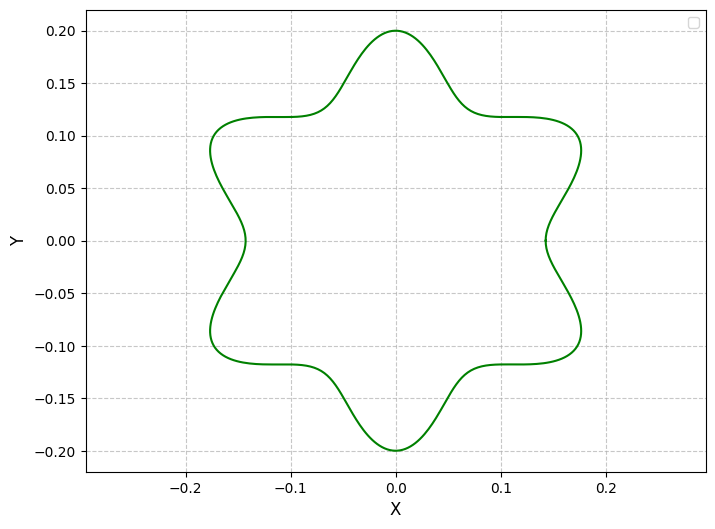

In [6]:
for k in range(2, 7):
    plot_radial(lambda t: 1/(k+np.cos(k*t)))

In [7]:
import random
from deap import gp
import numpy as np

pset = gp.PrimitiveSet("main", 1)
pset.addPrimitive(np.add, 2)
pset.addPrimitive(np.multiply, 2)
# pset.addPrimitive(np.divide, 2)
pset.addPrimitive(np.cos, 1)
pset.addPrimitive(np.sin, 1)
pset.addEphemeralConstant('rand', (np.random.rand, 1)[0])

pset.renameArguments(ARG0="t")

In [8]:
pset.mapping['t']

In [9]:
pset.terminals[pset.ret]

[<deap.gp.Terminal at 0x10dfaa000>, deap.gp.rand]

In [10]:
pset.primitives[pset.ret][2].name

'cos'

In [11]:
import random
import sys

def generate_2pi_periordic(pset):
    res = []
    # if random.random() < 0.5:
    #     k = random.randint(1, 6)
    #     res.append(pset.mapping['add'])
    #     res.append(gp.Terminal(2*k, False, object))
    #     res.append(pset.mapping['cos'])
    #     res.append(pset.mapping['multiply'])
    #     res.append(gp.Terminal(k, False, object))
    #     res.append(pset.mapping['t'])
    #     return res

    res.append(random.choice((pset.mapping['sin'], pset.mapping['cos'])))
    term = random.choice(pset.terminals[pset.ret])
    if type(term) is gp.MetaEphemeral:
        term = term()
    res.append(term)
    return res

        # res.append(pset.mapping['divide'])
        # res.append(pset.mapping['add'])
        # res.append(gp.Terminal(2*k, False, object))
        # res.append(pset.mapping['cos'])
        # res.append(pset.mapping['multiply'])
        # res.append(gp.Terminal(k, False, object))
        # res.append(pset.mapping['t'])
        # res.append(gp.Terminal(4*k, False, object))


def generate(pset, min_, max_, condition, type_=None):
    """Generate a tree as a list of primitives and terminals in a depth-first
    order. The tree is built from the root to the leaves, and it stops growing
    the current branch when the *condition* is fulfilled: in which case, it
    back-tracks, then tries to grow another branch until the *condition* is
    fulfilled again, and so on. The returned list can then be passed to the
    constructor of the class *PrimitiveTree* to build an actual tree object.

    :param pset: Primitive set from which primitives are selected.
    :param min_: Minimum height of the produced trees.
    :param max_: Maximum Height of the produced trees.
    :param condition: The condition is a function that takes two arguments,
                      the height of the tree to build and the current
                      depth in the tree.
    :param type_: The type that should return the tree when called, when
                  :obj:`None` (default) the type of :pset: (pset.ret)
                  is assumed.
    :returns: A grown tree with leaves at possibly different depths
              depending on the condition function.
    """
    if type_ is None:
        type_ = pset.ret
    expr = []
    height = random.randint(min_, max_)
    stack = [(0, type_)]
    while len(stack) != 0:
        depth, type_ = stack.pop()
        if condition(height, depth):
            expr.extend(generate_2pi_periordic(pset))
            # try:
            #     term = random.choice(pset.terminals[type_])
                
            # except IndexError:
            #     _, _, traceback = sys.exc_info()
            #     raise IndexError("The gp.generate function tried to add "
            #                      "a terminal of type '%s', but there is "
            #                      "none available." % (type_,)).with_traceback(traceback)
            # if type(term) is MetaEphemeral:
            #     term = term()
            # expr.append(term)
        else:
            try:
                prim = random.choice(pset.primitives[type_])
            except IndexError:
                _, _, traceback = sys.exc_info()
                raise IndexError("The gp.generate function tried to add "
                                 "a primitive of type '%s', but there is "
                                 "none available." % (type_,)).with_traceback(traceback)
            expr.append(prim)
            for arg in reversed(prim.args):
                stack.append((depth + 1, arg))
    return expr

def genFull(pset, min_, max_, type_=None):
    """Generate an expression where each leaf has the same depth
    between *min* and *max*.

    :param pset: Primitive set from which primitives are selected.
    :param min_: Minimum height of the produced trees.
    :param max_: Maximum Height of the produced trees.
    :param type_: The type that should return the tree when called, when
                  :obj:`None` (default) the type of :pset: (pset.ret)
                  is assumed.
    :returns: A full tree with all leaves at the same depth.
    """

    def condition(height, depth):
        """Expression generation stops when the depth is equal to height."""
        return depth == height

    return generate(pset, min_, max_, condition, type_)


def genGrow(pset, min_, max_, type_=None):
    """Generate an expression where each leaf might have a different depth
    between *min* and *max*.

    :param pset: Primitive set from which primitives are selected.
    :param min_: Minimum height of the produced trees.
    :param max_: Maximum Height of the produced trees.
    :param type_: The type that should return the tree when called, when
                  :obj:`None` (default) the type of :pset: (pset.ret)
                  is assumed.
    :returns: A grown tree with leaves at possibly different depths.
    """

    def condition(height, depth):
        """Expression generation stops when the depth is equal to height
        or when it is randomly determined that a node should be a terminal.
        """
        return depth == height or \
            (depth >= min_ and random.random() < pset.terminalRatio)

    return generate(pset, min_, max_, condition, type_)


def genHalfAndHalf(pset, min_, max_, type_=None):
    """Generate an expression with a PrimitiveSet *pset*.
    Half the time, the expression is generated with :func:`~deap.gp.genGrow`,
    the other half, the expression is generated with :func:`~deap.gp.genFull`.

    :param pset: Primitive set from which primitives are selected.
    :param min_: Minimum height of the produced trees.
    :param max_: Maximum Height of the produced trees.
    :param type_: The type that should return the tree when called, when
                  :obj:`None` (default) the type of :pset: (pset.ret)
                  is assumed.
    :returns: Either, a full or a grown tree.
    """
    method = random.choice((genGrow, genFull))
    return method(pset, min_, max_, type_)

In [12]:
from deap import creator, base, tools, algorithms

creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", gp.PrimitiveTree, fitness=creator.FitnessMin)

toolbox = base.Toolbox()
# toolbox.register('expr', gp.genHalfAndHalf, pset=pset, min_=5, max_=10)
toolbox.register('expr', genHalfAndHalf, pset=pset, min_=5, max_=10)
toolbox.register('individual', tools.initIterate, creator.Individual, toolbox.expr)
toolbox.register('population', tools.initRepeat, list, toolbox.individual)
toolbox.register('compile', gp.compile, pset=pset)

add(sin(sin(add(add(multiply(sin(add(multiply(add(cos(t), sin(t)), sin(cos(0.702277481896961))), multiply(add(sin(t), sin(0.9780614970546949)), sin(0.15731376866791646)))), add(sin(t), sin(cos(add(sin(0.5150075379458002), sin(0.28224926466410094)))))), cos(t)), multiply(sin(t), multiply(cos(sin(cos(cos(0.781867303921578)))), cos(0.47883240426318985)))))), sin(sin(multiply(sin(sin(add(cos(t), cos(cos(t))))), sin(sin(t))))))


/var/folders/yp/sztpn13x2vq42vlgbb1zx8b80000gn/T/ipykernel_15026/1448972256.py:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


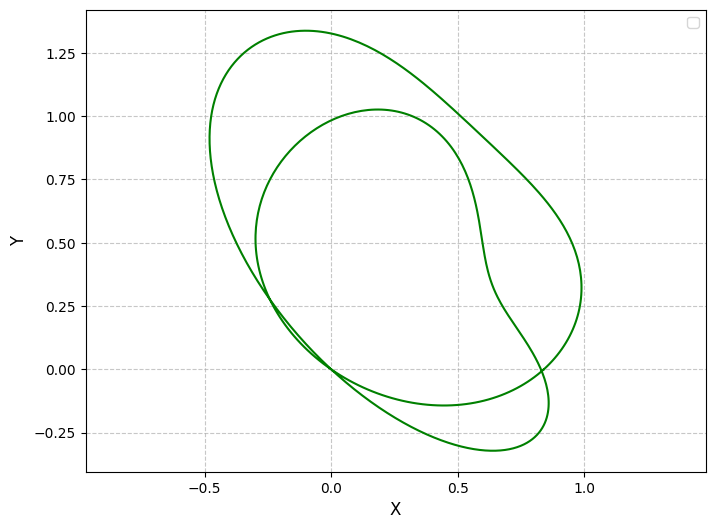

multiply(sin(sin(cos(multiply(sin(cos(t)), sin(cos(t)))))), cos(add(add(cos(multiply(sin(0.2178033945027883), sin(t))), multiply(add(sin(t), cos(0.870978378562972)), multiply(sin(0.5192741149269521), cos(t)))), add(multiply(cos(sin(t)), cos(sin(t))), sin(sin(cos(0.668275636845748)))))))


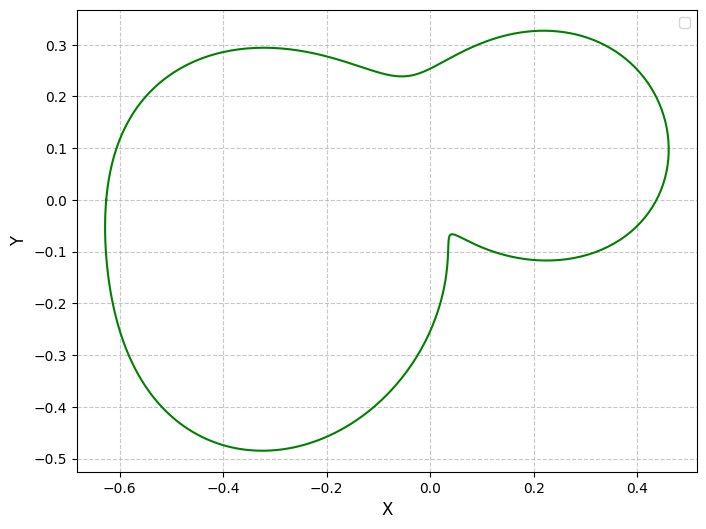

multiply(cos(multiply(add(sin(sin(t)), add(sin(t), sin(t))), multiply(add(sin(0.7664476512772325), cos(t)), cos(sin(t))))), add(cos(sin(cos(sin(0.19124687238987637)))), multiply(add(add(cos(0.2870521877938258), sin(0.8715819769578728)), add(cos(0.38885205132133427), cos(t))), cos(multiply(cos(t), sin(t))))))


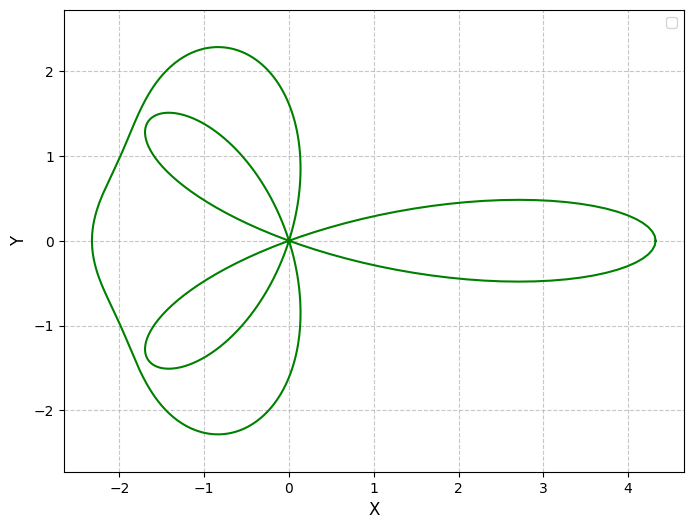

add(multiply(cos(multiply(multiply(multiply(add(sin(cos(t)), multiply(sin(t), cos(t))), cos(multiply(cos(t), sin(t)))), multiply(multiply(sin(sin(0.6161934071983902)), add(sin(0.3634682081887127), sin(0.500061143789828))), add(multiply(sin(0.5304394528299302), cos(t)), add(sin(t), sin(t))))), multiply(multiply(add(multiply(sin(0.7222029670544332), cos(t)), add(cos(0.26594971322259886), sin(t))), sin(add(sin(0.8944663831370804), cos(0.8404876190946162)))), add(cos(sin(sin(0.23904191081107995))), cos(cos(cos(t))))))), add(multiply(sin(multiply(sin(cos(cos(t))), cos(add(sin(0.9623601741249727), sin(t))))), cos(multiply(add(add(cos(0.9302568294545834), cos(0.4326088202683154)), multiply(cos(0.7887561605068835), cos(t))), multiply(multiply(sin(0.17317840149985275), cos(t)), add(cos(0.8529485184395437), cos(0.8869781146610582)))))), multiply(add(add(multiply(multiply(cos(0.4461514572131955), sin(0.7970300273448281)), sin(cos(0.13922647538230615))), cos(cos(sin(0.11328227641056543)))), add(mu

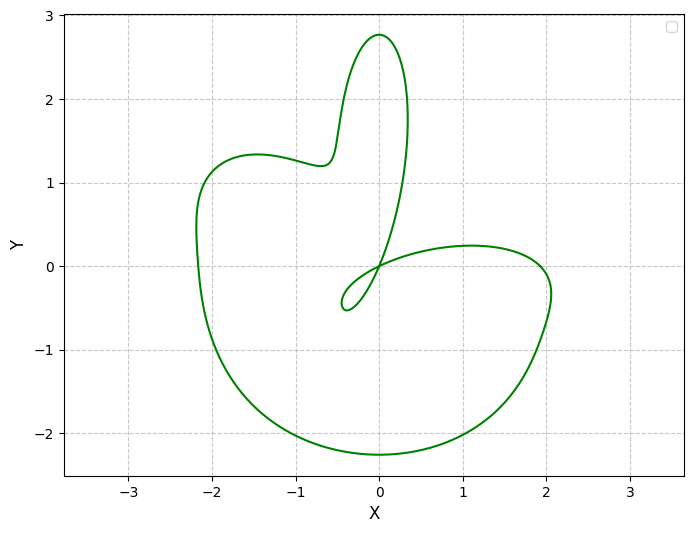

multiply(sin(multiply(multiply(multiply(multiply(sin(multiply(cos(0.3913142381408595), cos(t))), cos(t)), cos(add(sin(cos(t)), sin(sin(t))))), multiply(cos(t), multiply(add(multiply(cos(0.6616151943144667), cos(t)), cos(sin(t))), multiply(sin(sin(0.5295510098065156)), cos(t))))), multiply(multiply(sin(0.6584581938092174), multiply(sin(0.30009943263336014), multiply(cos(0.7541830391105014), multiply(sin(0.11314312978132524), cos(t))))), cos(sin(t))))), sin(multiply(multiply(multiply(add(sin(t), sin(add(cos(0.23351802060923543), sin(0.040103941691825185)))), sin(0.3690681982616171)), sin(cos(cos(add(cos(0.21985943049815537), sin(0.45263447602816864)))))), sin(multiply(sin(cos(multiply(cos(t), cos(0.44759311781155264)))), sin(0.6961408600213775))))))


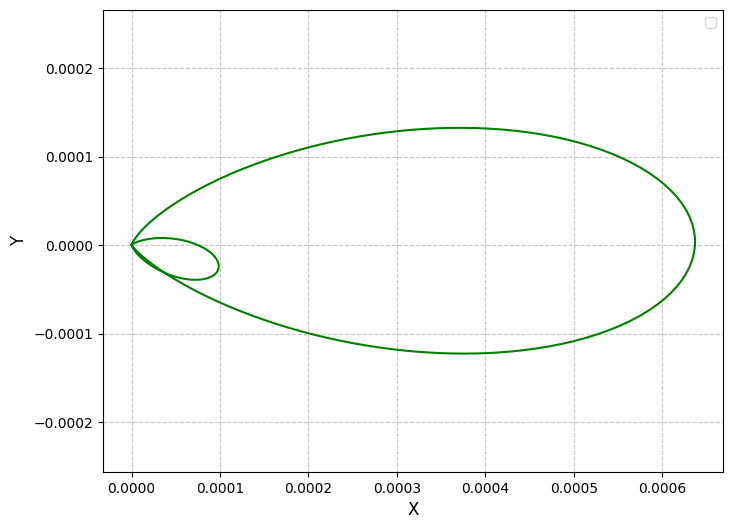

sin(sin(cos(add(cos(add(add(sin(t), sin(0.9928597950533478)), sin(add(add(add(cos(0.7596715656861944), sin(t)), cos(cos(0.47555880781574156))), multiply(cos(cos(t)), multiply(sin(0.6310740144903648), cos(0.7860473096512692))))))), multiply(sin(sin(0.0644204805302282)), add(multiply(cos(0.10648636285718827), sin(cos(t))), sin(sin(0.2969733453213711))))))))


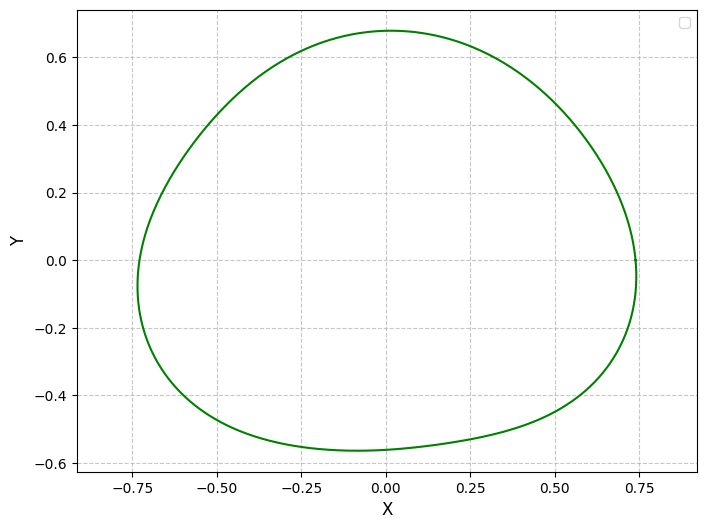

sin(add(cos(sin(cos(cos(sin(0.8140397445933604))))), sin(multiply(sin(cos(sin(t))), sin(cos(sin(t)))))))


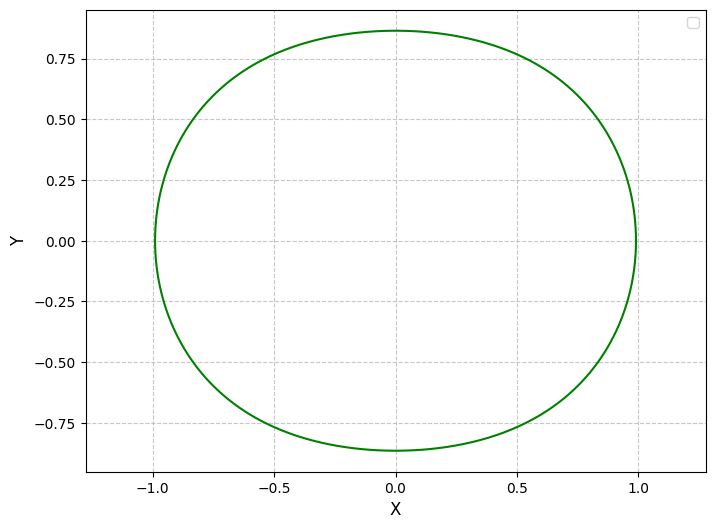

add(add(add(cos(add(cos(0.2972273370120051), cos(add(multiply(add(cos(sin(t)), cos(sin(t))), cos(0.9876935574322222)), add(add(add(cos(0.8596873993519031), sin(t)), cos(0.4686672733288847)), sin(sin(sin(t)))))))), cos(cos(multiply(multiply(cos(0.17099108516941663), cos(sin(0.49245495992363764))), sin(0.914230406982637))))), cos(cos(sin(cos(add(cos(cos(sin(cos(t)))), multiply(cos(cos(t)), multiply(multiply(sin(0.34086228725512724), sin(0.7104098266425755)), cos(0.9212705027728859))))))))), multiply(cos(add(cos(cos(sin(cos(0.2696034447660798)))), cos(cos(add(sin(multiply(multiply(cos(0.36749099120665285), sin(0.7115571755492127)), multiply(cos(t), sin(0.18955925344247693)))), add(add(sin(cos(t)), sin(0.7224870211188247)), add(add(cos(0.9054017441978766), sin(t)), multiply(sin(0.9507408348457144), cos(t))))))))), cos(sin(multiply(multiply(sin(t), multiply(sin(t), sin(0.1464582363694965))), sin(multiply(cos(0.685482486493854), sin(0.8575047669475536))))))))


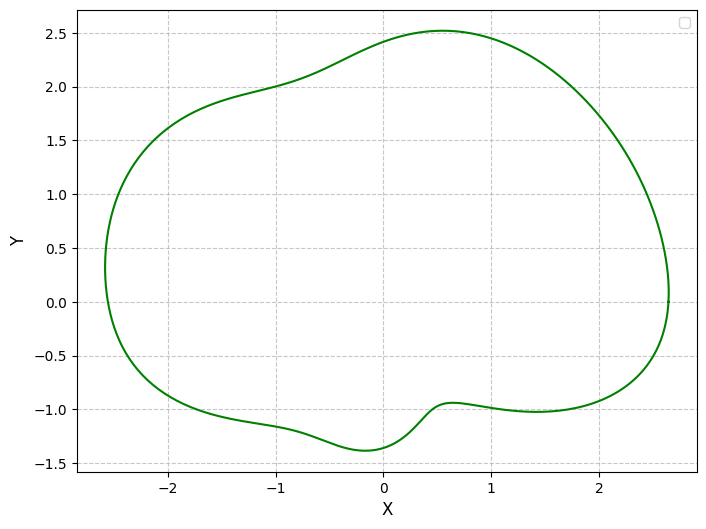

sin(cos(add(add(cos(cos(add(add(cos(t), cos(t)), cos(t)))), multiply(cos(0.10549434857504103), cos(t))), multiply(multiply(add(sin(t), cos(cos(cos(t)))), sin(sin(multiply(sin(0.3583176667968955), cos(0.9618576509098037))))), sin(sin(sin(multiply(sin(0.16246111881234515), cos(0.2512538765352439)))))))))


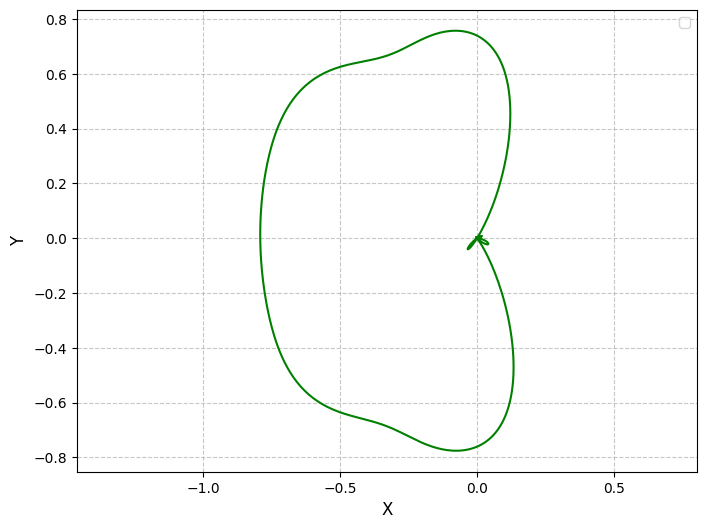

sin(multiply(add(multiply(add(cos(add(sin(cos(multiply(cos(0.9110015895237872), sin(t)))), add(add(cos(sin(t)), add(sin(t), sin(0.9063168900792292))), cos(add(cos(t), sin(t)))))), add(sin(multiply(sin(multiply(cos(0.1883063555145067), cos(0.48122755121044547))), add(sin(cos(0.6654416735239348)), add(sin(t), cos(0.9935546351733057))))), add(cos(multiply(multiply(cos(t), cos(t)), sin(cos(0.356622679886625)))), sin(add(sin(sin(t)), cos(sin(t))))))), multiply(cos(cos(add(sin(add(sin(0.46523456686228903), cos(0.9312028217442735))), sin(multiply(sin(t), cos(t)))))), multiply(cos(multiply(multiply(cos(sin(0.8729488883858126)), cos(sin(0.6061437632883612))), cos(add(cos(t), cos(t))))), add(sin(add(sin(sin(t)), cos(cos(t)))), sin(sin(sin(sin(t)))))))), cos(sin(cos(cos(cos(cos(sin(cos(0.4107208498353315))))))))), cos(sin(sin(sin(add(add(cos(add(cos(t), cos(t))), multiply(sin(cos(0.9745804161403313)), sin(cos(0.49198331651365823)))), cos(cos(multiply(sin(0.20638343171772744), sin(0.64695385631631

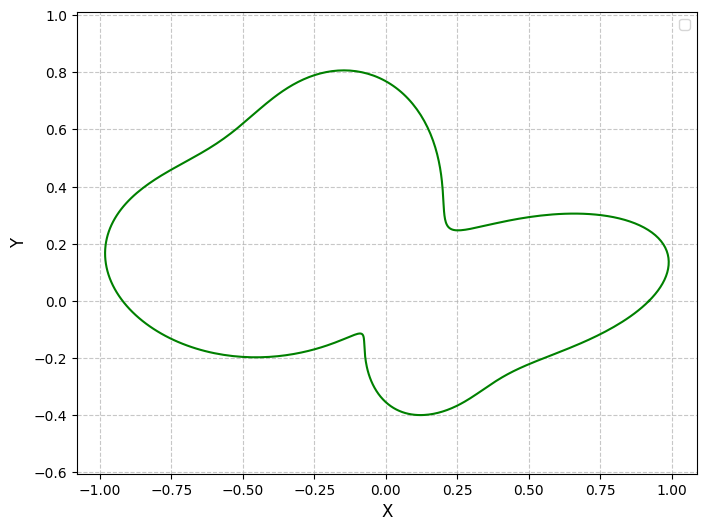

add(add(add(cos(add(multiply(sin(add(cos(cos(0.8667991169553213)), multiply(cos(0.9813180406728991), sin(0.22790686687527728)))), multiply(multiply(sin(cos(0.07243007737106344)), add(cos(t), sin(t))), cos(add(cos(0.8269339840275576), sin(0.03624140546146104))))), sin(multiply(cos(multiply(cos(0.8998137074502455), sin(t))), add(add(cos(t), sin(0.9061646680252198)), cos(cos(0.5818095674768804))))))), add(sin(add(cos(sin(add(cos(t), cos(0.7303320660691942)))), sin(add(cos(sin(t)), add(cos(0.262381352458133), sin(t)))))), cos(multiply(cos(cos(add(cos(t), sin(0.5542427750681144)))), sin(multiply(add(sin(0.3563788401200524), cos(t)), add(sin(t), sin(0.693271626413503)))))))), multiply(multiply(add(add(sin(add(cos(cos(0.5549819542536977)), multiply(sin(t), cos(t)))), sin(multiply(cos(cos(0.37768500191751186)), sin(cos(0.15205495806862024))))), add(add(add(add(cos(t), cos(t)), add(cos(0.09568482087572716), sin(t))), multiply(cos(cos(0.05054638999846406)), cos(cos(t)))), add(sin(multiply(sin(0.

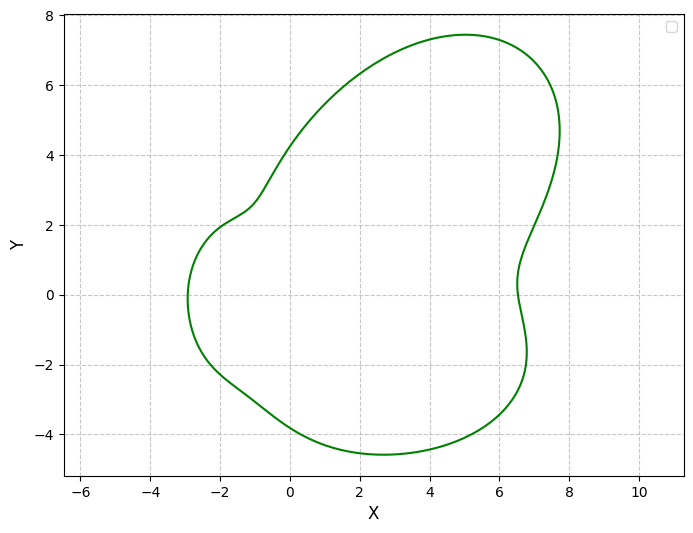

cos(sin(cos(multiply(add(cos(cos(add(cos(add(sin(0.026378627471679406), sin(t))), add(cos(cos(0.1634969297669676)), multiply(sin(0.26475032730949133), cos(t)))))), add(sin(cos(add(cos(cos(0.2311009357928745)), add(sin(0.9634388756837032), cos(t))))), cos(cos(add(sin(cos(0.4610718748417859)), multiply(sin(t), sin(t))))))), add(cos(sin(cos(multiply(sin(sin(0.20835185750919305)), sin(cos(0.2827260409716166)))))), multiply(add(add(multiply(cos(sin(0.47973991316277365)), add(cos(0.5755866364122831), cos(t))), sin(sin(sin(t)))), add(add(cos(cos(t)), multiply(cos(t), cos(t))), multiply(sin(cos(0.7061035053807768)), sin(sin(t))))), cos(cos(multiply(multiply(cos(0.02001931427818948), sin(t)), sin(sin(t)))))))))))


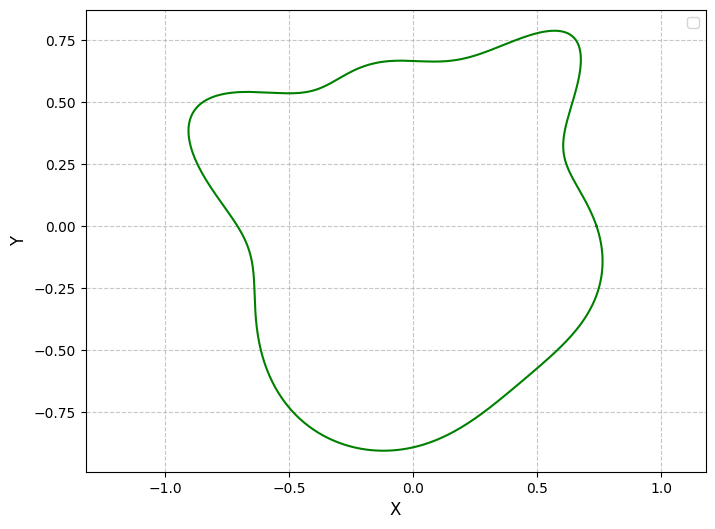

add(cos(multiply(add(cos(cos(0.6985030634399193)), sin(cos(t))), cos(sin(sin(t))))), sin(add(sin(sin(cos(t))), sin(cos(sin(t))))))


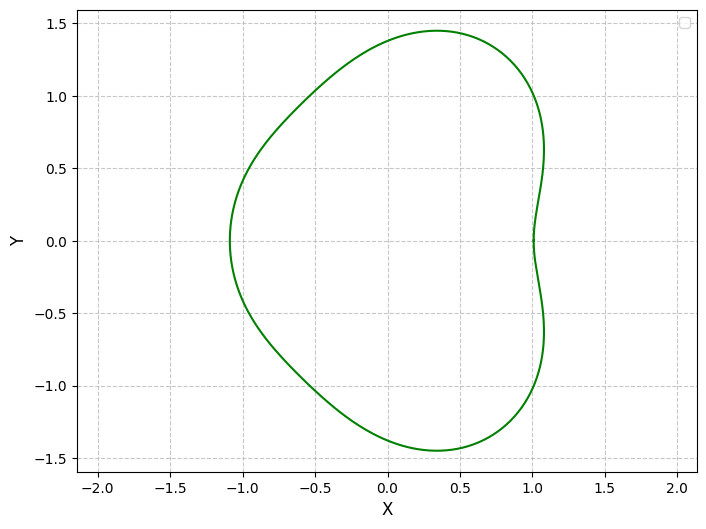

In [ ]:
import time
for i in range(100):
    ind = toolbox.individual()
    print(ind)
    ind_func = gp.compile(expr=ind, pset=pset)
    plot_radial(ind_func)
    time.sleep(1.0)